# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Josiah Randleman

### GitHub Profile Link: https://github.com/jrandl

### GitHub Repo Link: https://github.com/jrandl/article-summarizer

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Imports:

In [1]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import json
from spacytextblob.spacytextblob import SpacyTextBlob

print('All prereqs installed.')
!pip list

All prereqs installed.
Package                   Version
------------------------- ----------------
annotated-types           0.7.0
apturl                    0.5.2
asttokens                 2.4.1
attrs                     24.2.0
bcrypt                    3.2.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blinker                   1.4
blis                      1.0.1
Brlapi                    0.8.3
catalogue                 2.0.10
certifi                   2020.6.20
chardet                   4.0.0
click                     8.0.3
cloudpathlib              0.20.0
colorama                  0.4.4
comm                      0.2.2
command-not-found         0.3
confection                0.1.5
contourpy                 1.3.1
cryptography              3.4.8
cupshelpers               1.0
cycler                    0.12.1
cymem                     2.0.8
dbus-python               1.2.18
debugpy                   1.8.8
decorator                 5.1.1
defer                     1.0.6


### Question 1:

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
import requests

from bs4 import BeautifulSoup

import pickle

def extract_and_save_html(url, filename="article.pkl"):

    response = requests.get(url)

    response.raise_for_status()  # Raise an error if request fails

    soup = BeautifulSoup(response.content, 'html.parser')

    html_content = str(soup)



    with open(filename, 'wb') as f:

        pickle.dump(html_content, f)

link_to_article = "https://www.livescience.com/technology/artificial-intelligence/meet-chameleon-an-ai-model-that-can-protect-you-from-facial-recognition-thanks-to-a-sophisticated-digital-mask"

extract_and_save_html(link_to_article) 


### Question 2:

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [3]:
import pickle
from bs4 import BeautifulSoup
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

file_name = 'article.pkl'

# Load the HTML content from the pickle file
with open(file_name, 'rb') as webpage:
    data = pickle.load(webpage)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(data, 'html.parser')

# Extract the article content from the specific div
article = soup.find('div', id='article-body', class_='text-copy bodyCopy auto')

# Extract the plain text from the article
article_text = article.get_text(separator="\n").strip() if article else "Article content not found."

# Run SpacyTextBlob for sentiment analysis
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_text)
polarity = doc._.blob.polarity

# Print polarity score
print("Polarity Score of Article: ", polarity)

# Print the number of sentences
print("Number of Sentences In Article: ", format(len(list(doc.sents))))

Polarity Score of Article:  0.010617715617715613
Number of Sentences In Article:  22


### Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [4]:
import spacy
from collections import Counter

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Input text
text = article_text

# Process the text
doc = nlp(text)

# Filter out stop words, punctuation, and whitespace, and convert tokens to lowercase
words = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each filtered word
word_freq = Counter(words)

# Get the 5 most frequent words
top_5_words = word_freq.most_common(5)

# Print the results with appropriate labels
print("Top 5 most frequent tokens:")
for word, freq in top_5_words:
    print(f"Token: '{word}', Frequency: {freq}")

Top 5 most frequent tokens:
Token: 'chameleon', Frequency: 10
Token: 'ai', Frequency: 7
Token: 'image', Frequency: 7
Token: 'facial', Frequency: 6
Token: 'models', Frequency: 6


### Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [5]:
import spacy
from collections import Counter

# Load the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Input text
text = article_text

# Process the text
doc = nlp(text)

# Filter out stop words, punctuation, and whitespace, and get lemmas in lowercase
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]

# Count the frequency of each lemma
lemma_freq = Counter(lemmas)

# Get the 5 most frequent lemmas
top_5_lemmas = lemma_freq.most_common(5)

# Print the results with appropriate labels
print("Top 5 most frequent lemmas:")
for lemma, freq in top_5_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")

Top 5 most frequent lemmas:
Lemma: 'image', Frequency: 12
Lemma: 'chameleon', Frequency: 10
Lemma: 'model', Frequency: 8
Lemma: 'ai', Frequency: 7
Lemma: 'facial', Frequency: 6


### Question 5:

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Polarity Score of Article:  0.010617715617715613
Number of Sentences In Article:  22


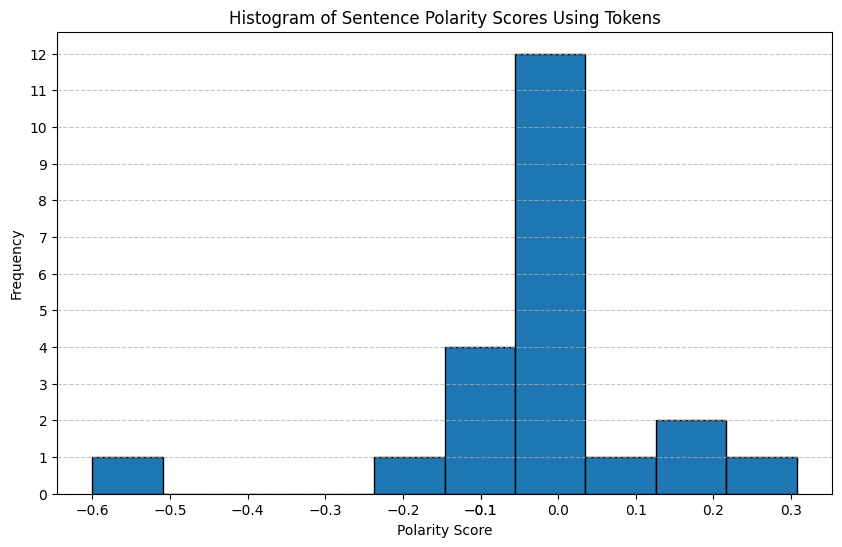

In [6]:
# Initialize the SpaCy pipeline and add SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
if 'spacytextblob' not in nlp.pipe_names:
    nlp.add_pipe('spacytextblob', last=True)

# Process the article text
doc = nlp(article_text)

# Calculate sentiment polarity for each sentence
sentence_scores_tokens = [sent._.blob.polarity for sent in doc.sents]

# Calculate the overall polarity of the article
polarity = doc._.blob.polarity

# Print polarity score for the entire article
print("Polarity Score of Article: ", polarity)

# Print the number of sentences in the article
num_sentences = len(list(doc.sents))
print("Number of Sentences In Article: ", num_sentences)

# Plot a histogram of the sentence polarity scores
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(sentence_scores_tokens, bins=10, edgecolor='black')
plt.title('Histogram of Sentence Polarity Scores Using Tokens')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis ticks for all bin edges
plt.xticks(bins.round(1))  # Round bin edges to 1 decimal places for clarity

# Set y-axis ticks from 0 to the maximum frequency
plt.yticks(range(0, int(n.max()) + 1))

plt.show()

#----------------------------------------------------------------------------------------#
# Question: From your histogram, what seems to be the most common range of scores?
# Answer: Looking at my histogram, the most common range of scores is between -0.1 and 0.0.
#----------------------------------------------------------------------------------------#

### Question 6:

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Polarity Score of Article (Using Lemmas):  0.001213304924242424
Number of Sentences In Article:  22


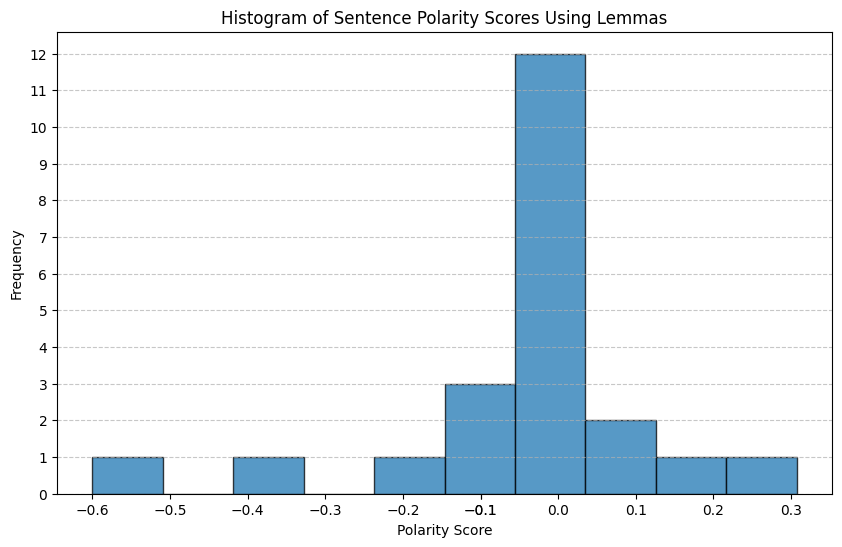

In [7]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt

# Initialize SpaCy pipeline and add SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
if 'spacytextblob' not in nlp.pipe_names:
    nlp.add_pipe('spacytextblob', last=True)

# Calculate sentiment polarity for each sentence based on lemmas
sentence_scores_lemmas = []
for sent in doc.sents:
    # Extract lemmas for each token in the sentence
    lemma_sentence = " ".join([token.lemma_ for token in sent if not token.is_punct])
    # Analyze the polarity of the lemma-based sentence
    lemma_doc = nlp(lemma_sentence)
    sentence_scores_lemmas.append(lemma_doc._.blob.polarity)

# Calculate the overall polarity of the article based on lemmas
lemma_article = " ".join([token.lemma_ for token in doc if not token.is_punct])
lemma_doc = nlp(lemma_article)
polarity = lemma_doc._.blob.polarity

# Print polarity score for the entire article
print("Polarity Score of Article (Using Lemmas): ", polarity)

# Print the number of sentences in the article
num_sentences = len(list(doc.sents))
print("Number of Sentences In Article: ", num_sentences)

# Plot a histogram of the sentence polarity scores
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(sentence_scores_lemmas, bins=10, edgecolor='black', alpha=0.75)
plt.title('Histogram of Sentence Polarity Scores Using Lemmas')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set x-axis ticks for all bin edges
plt.xticks(bins.round(1))  # Round bin edges to 1 decimal places for clarity

# Set y-axis ticks from 0 to the maximum frequency
plt.yticks(range(0, int(n.max()) + 1))

# Show the plot
plt.show()

#----------------------------------------------------------------------------------------#
# Question: From your histogram, what seems to be the most common range of scores?
# Answer: Looking at my histogram, the most common range of scores is between -0.1 and 0.0.
#----------------------------------------------------------------------------------------#

### Question 7:

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.0
* Cutoff Score (lemmas): 0.0

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [8]:
import numpy as np

# Calculate the median score for tokens
token_cutoff_score = np.median(sentence_scores_tokens)

# Calculate the median score for lemmasg
lemma_cutoff_score = np.median(sentence_scores_lemmas) 

# Print the cutoff scores
print("Cutoff Score (tokens): ", token_cutoff_score)
print("Cutoff Score (lemmas): ", lemma_cutoff_score)

Cutoff Score (tokens):  0.0
Cutoff Score (lemmas):  0.0


### Question 8:

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [9]:
# Create an empty list to store sentences that exceed the cutoff score
summary_sentences = []

# Loop through each sentence in the article
for sent in doc.sents:
    # Check if the token-based polarity score is greater than the cutoff score
    if sent._.blob.polarity > token_cutoff_score:
        # Add the sentence text (stripped of extra whitespace) to the summary list
        summary_sentences.append(sent.text.strip())

# Generate the summary by joining the selected sentences with a space
summary_text = ' '.join(summary_sentences)

# Print the generated summary
print("Generated Summary:\n")
print(summary_text)


Generated Summary:

A new study from Georgia Tech university, published July 19 to the pre-print 
arXiv
 database, details how researchers created an AI model called "Chameleon," which can produce a digital "single, personalized privacy protection (P-3) mask" for personal photos that thwarts unwanted facial scanning from detecting a person's face. "Privacy-preserving data sharing and analytics like Chameleon will help to advance governance and responsible adoption of AI technology and stimulate responsible science and innovation," said lead author of the study 
Ling Liu
, professor of data and intelligence-powered computing at Georgia Tech’s School of Computer Science (who developed the Chameleon model alongside other researchers), 
in a statement
. The first is the use of cross-image optimization that enables Chameleon to create one P3-Mask per user, rather than a new mask for each image. This means the AI system can deliver instant protection for a user, and also enables more efficie

### Question 9:

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [10]:
# Process the summary text to calculate its polarity
summary_doc = nlp(summary_text)

# Calculate the polarity score of the summary
summary_polarity = summary_doc._.blob.polarity

# Calculate the number of sentences in the summary
num_sentences_summary = len(list(summary_doc.sents))

# Print the results
print("Polarity Score of Summary Using Tokens: {:.4f}".format(summary_polarity))
print("Number of Sentences in Summary: ", num_sentences_summary)


Polarity Score of Summary Using Tokens: 0.1541
Number of Sentences in Summary:  5


### Question 10:

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [11]:
# Create an empty list to store sentences that exceed the cutoff score (lemmas)
summary_sentences_lemmas = []

# Loop through each sentence in the article
for sent in doc.sents:
    # Create a lemma-based sentence by joining the lemmas of all tokens in the sentence
    lemma_sentence = " ".join([token.lemma_ for token in sent if not token.is_punct])
    
    # Calculate the polarity of the lemma-based sentence
    lemma_doc = nlp(lemma_sentence)
    lemma_score = lemma_doc._.blob.polarity
    
    # Check if the lemma-based polarity score is greater than the cutoff score
    if lemma_score > lemma_cutoff_score:
        # Add the original sentence text (not lemmas, but human-readable) to the summary list
        summary_sentences_lemmas.append(sent.text.strip())

# Generate the summary by joining the selected sentences with a space
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the generated summary
print("Generated Summary (Using Lemmas):\n")
print(summary_text_lemmas)


Generated Summary (Using Lemmas):

A new study from Georgia Tech university, published July 19 to the pre-print 
arXiv
 database, details how researchers created an AI model called "Chameleon," which can produce a digital "single, personalized privacy protection (P-3) mask" for personal photos that thwarts unwanted facial scanning from detecting a person's face. "Privacy-preserving data sharing and analytics like Chameleon will help to advance governance and responsible adoption of AI technology and stimulate responsible science and innovation," said lead author of the study 
Ling Liu
, professor of data and intelligence-powered computing at Georgia Tech’s School of Computer Science (who developed the Chameleon model alongside other researchers), 
in a statement
. The first is the use of cross-image optimization that enables Chameleon to create one P3-Mask per user, rather than a new mask for each image. This means the AI system can deliver instant protection for a user, and also enabl

### Question 11:

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [12]:
# Process the summary text to calculate its overall polarity
summary_doc_lemmas = nlp(summary_text_lemmas)
summary_polarity_lemmas = summary_doc_lemmas._.blob.polarity

# Calculate the number of sentences in the summary
num_sentences_summary_lemmas = len(list(summary_doc_lemmas.sents))

# Print the polarity score of the summary and the number of sentences
print("\nPolarity Score of Summary (Using Lemmas): {:.4f}".format(summary_polarity_lemmas))
print("Number of Sentences in Summary: ", num_sentences_summary_lemmas)


Polarity Score of Summary (Using Lemmas): 0.1541
Number of Sentences in Summary:  5


### Question 12:

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

---
### Score of Article Using Tokens 

Polarity Score of Article: 0.010617715617715613  
Number of Sentences In Article: 22


### Score of Article Using Lemmas 

Polarity Score of Article (Using Lemmas): 0.001213304924242424   
Number of Sentences In Article: 22

---
### Score of Summary Using Tokens 

Polarity Score of Summary: 0.1541  
Number of Sentences In Summary: 5


### Score of Summary Using Lemmas 

Polarity Score of Summary (Using Lemmas): 0.1541   
Number of Sentences In Summary: 5

---

### Comparison Answer:
Looking at the polarity scores of the initial article and the summaries there is slight differences. The polarity for the article for the tokens is 0.0106 and the score of the tokens for the summary is 0.1541. So, there is an increase and for the Lemmas for the article it is 0.001 and for the summary it is 0.1541. I think that this increase is attributed to selecting values for the summary that are greater than the cutoff thus leading to sentences that are more positive leading to an increase in score.

### Question 13:

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

### Answer:
Honestly, regarding both of my summaries, there isn't a difference. Both the token-based summary and the lemma-based summary appear to be the same. So, neither of them is better than the other but they are both equally good and the same. I think this might be because both the token and lemma cases work similarly in the code. Also, the author might have chosen words that lack variation and that are simple. Since the words don't have a lot of variations to them for the lemmas, then the results would yield results that are almost similar or identical to the summaries. Based on this analysis, this is why I think both the token-based and the lemma-based summaries are pretty much the same.